In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
time_folder = "24-08-06"
base_folder = "/data3/lsf/Pein/Power-Prediction/res_output/"

path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
clip_value = 100000
df["train_rmse"] = df["train_rmse"].clip(upper=clip_value)
df["val_rmse"] = df["val_rmse"].clip(upper=clip_value)
df["test_rmse"] = df["test_rmse"].clip(upper=clip_value)

# Display the first few rows of the dataframe
print(df.head())

# remove those rows where the val_rmse and test_rmse are larger than 1000
# df = df[df["val_rmse"] <= 1000]
# df = df[df["test_rmse"] <= 1000]


           exp_date  train_rmse  train_custom_acc  val_rmse_for_best_train  \
0  2024-08-07 00:13  233.426130         64.641815                534.45294   
1  2024-08-07 02:24   58.993080         89.288742                395.54175   
2  2024-08-07 02:27   87.311264         84.767014                427.82400   
3  2024-08-07 02:14   44.718260         90.686348                423.58167   
4  2024-08-07 00:47   47.992980         90.623451                503.41608   

   val_custom_acc_for_best_train  test_rmse_for_best_train  \
0                      34.521412                 598.18080   
1                      52.156986                 490.58588   
2                      47.979115                 486.04276   
3                      50.365742                 506.02520   
4                      41.686813                 595.65580   

   test_custom_acc_for_best_train  train_epoch_for_best_train    val_rmse  \
0                       25.386541                          15   435.19727   
1   

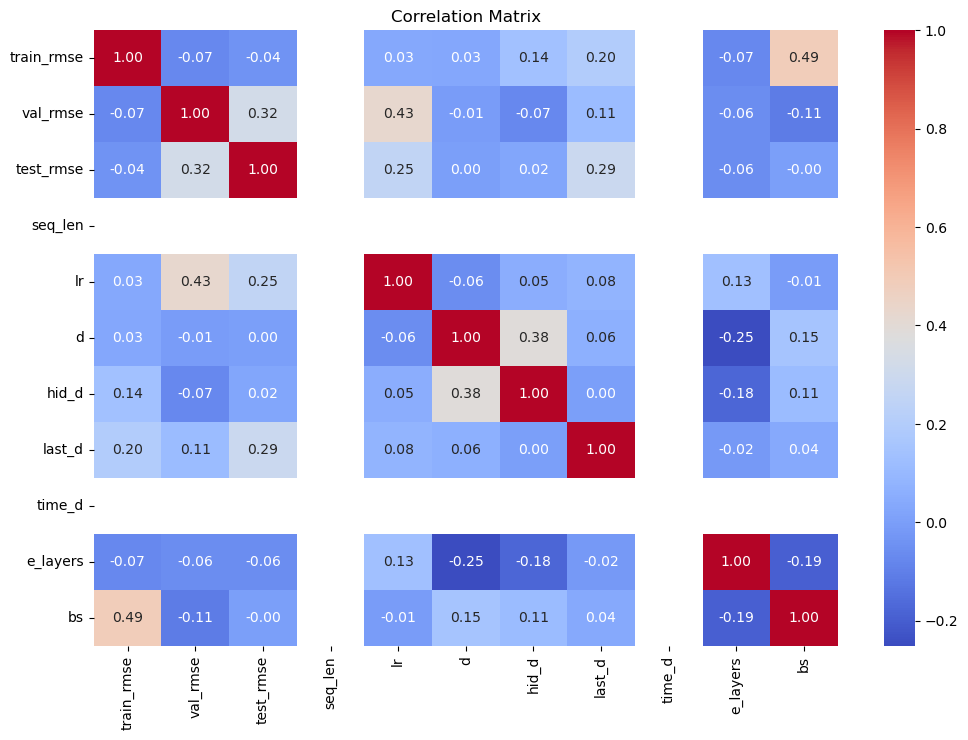

In [4]:
# Correlation matrix
corr_matrix = df[
    [
        "train_rmse",
        "val_rmse",
        "test_rmse",
        "seq_len",
        "lr",
        "d",
        "hid_d",
        "last_d",
        "time_d",
        "e_layers",
        "bs",
    ]
].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [5]:
# # Pairplot to visualize relationships
# sns.pairplot(
#     df[
#         [
#             "train_rmse",
#             "val_rmse",
#             "test_rmse",
#             "seq_len",
#             "lr",
#             "d",
#             "hid_d",
#             "last_d",
#             "time_d",
#             "e_layers",
#             "bs",
#         ]
#     ]
# )
# plt.show()

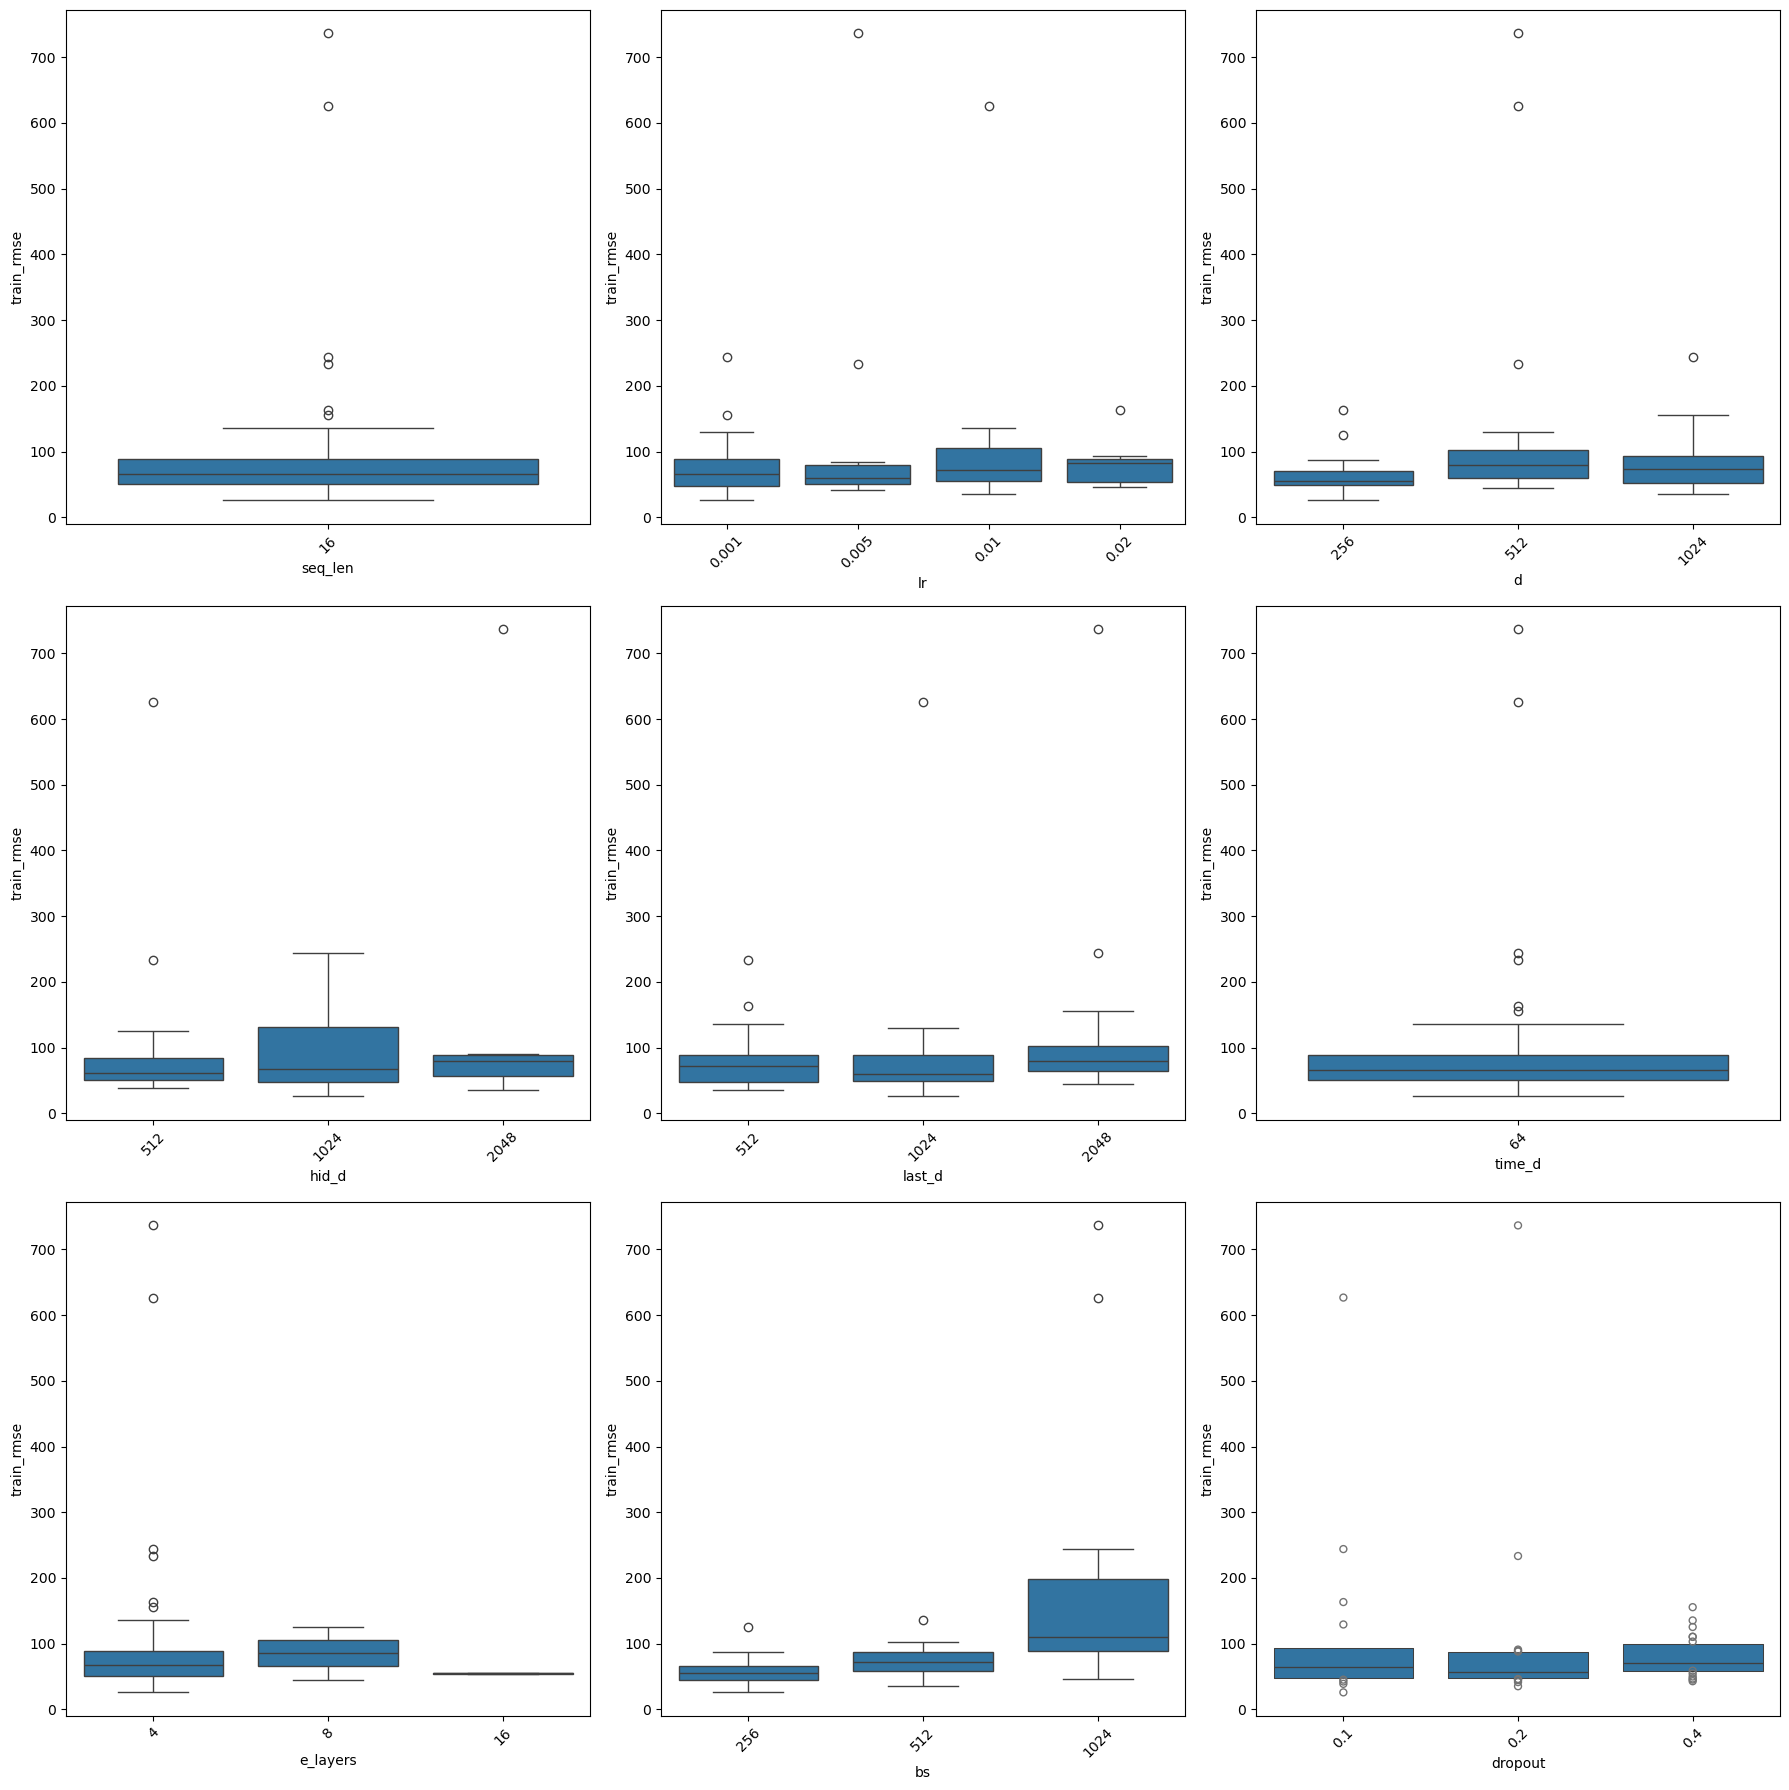

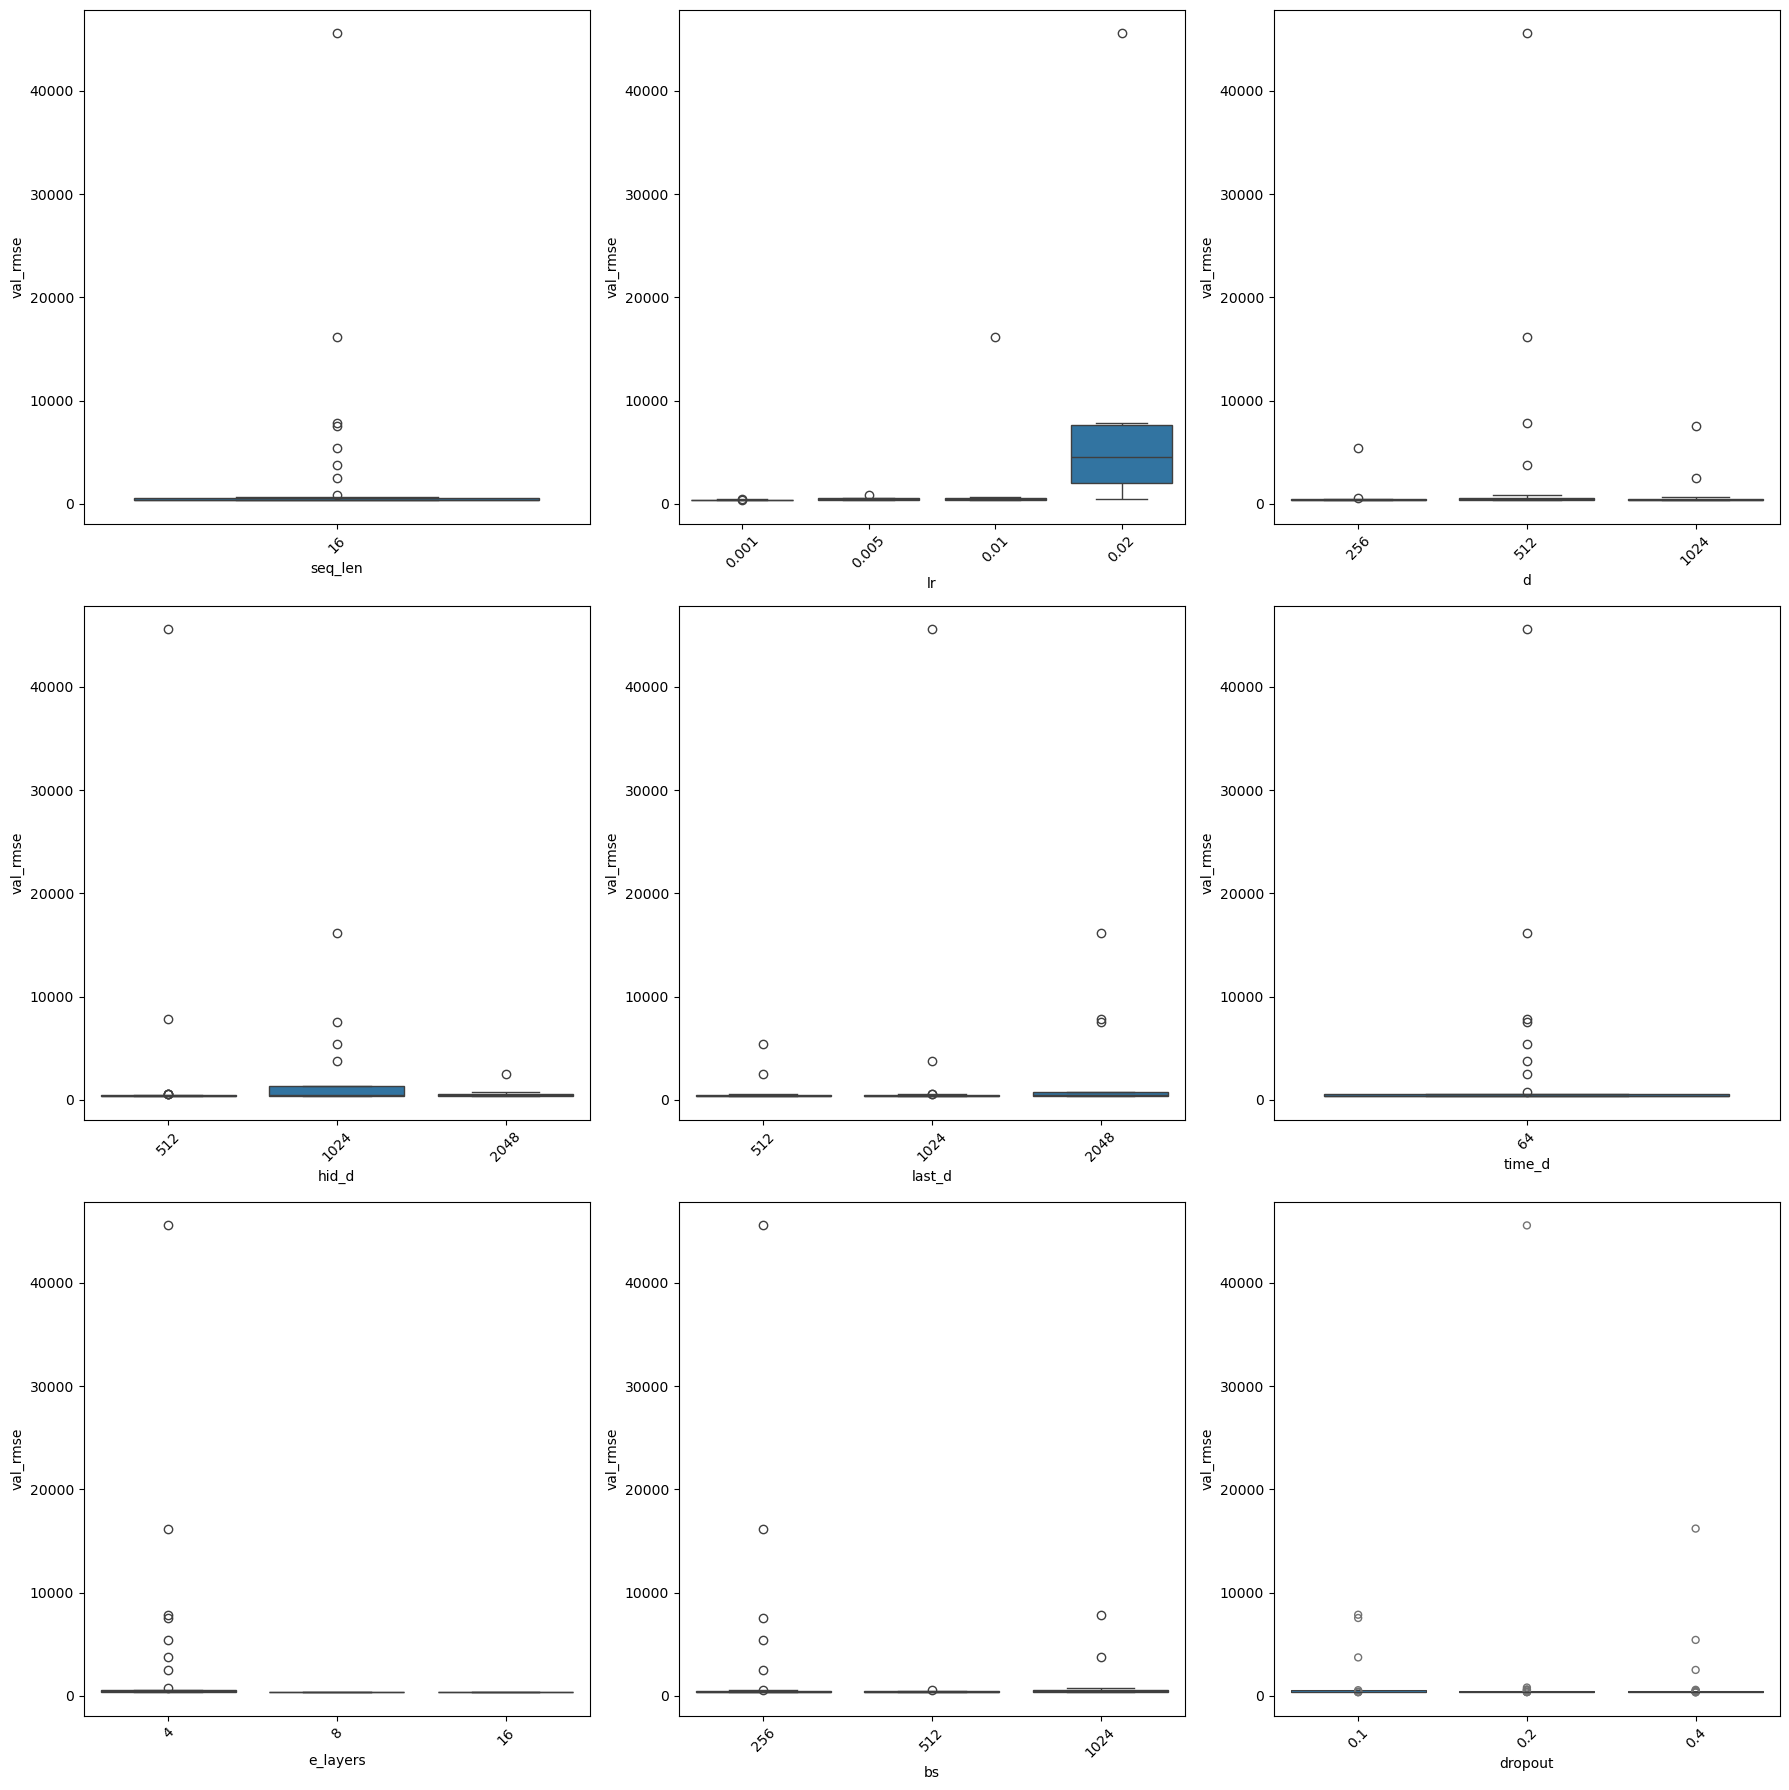

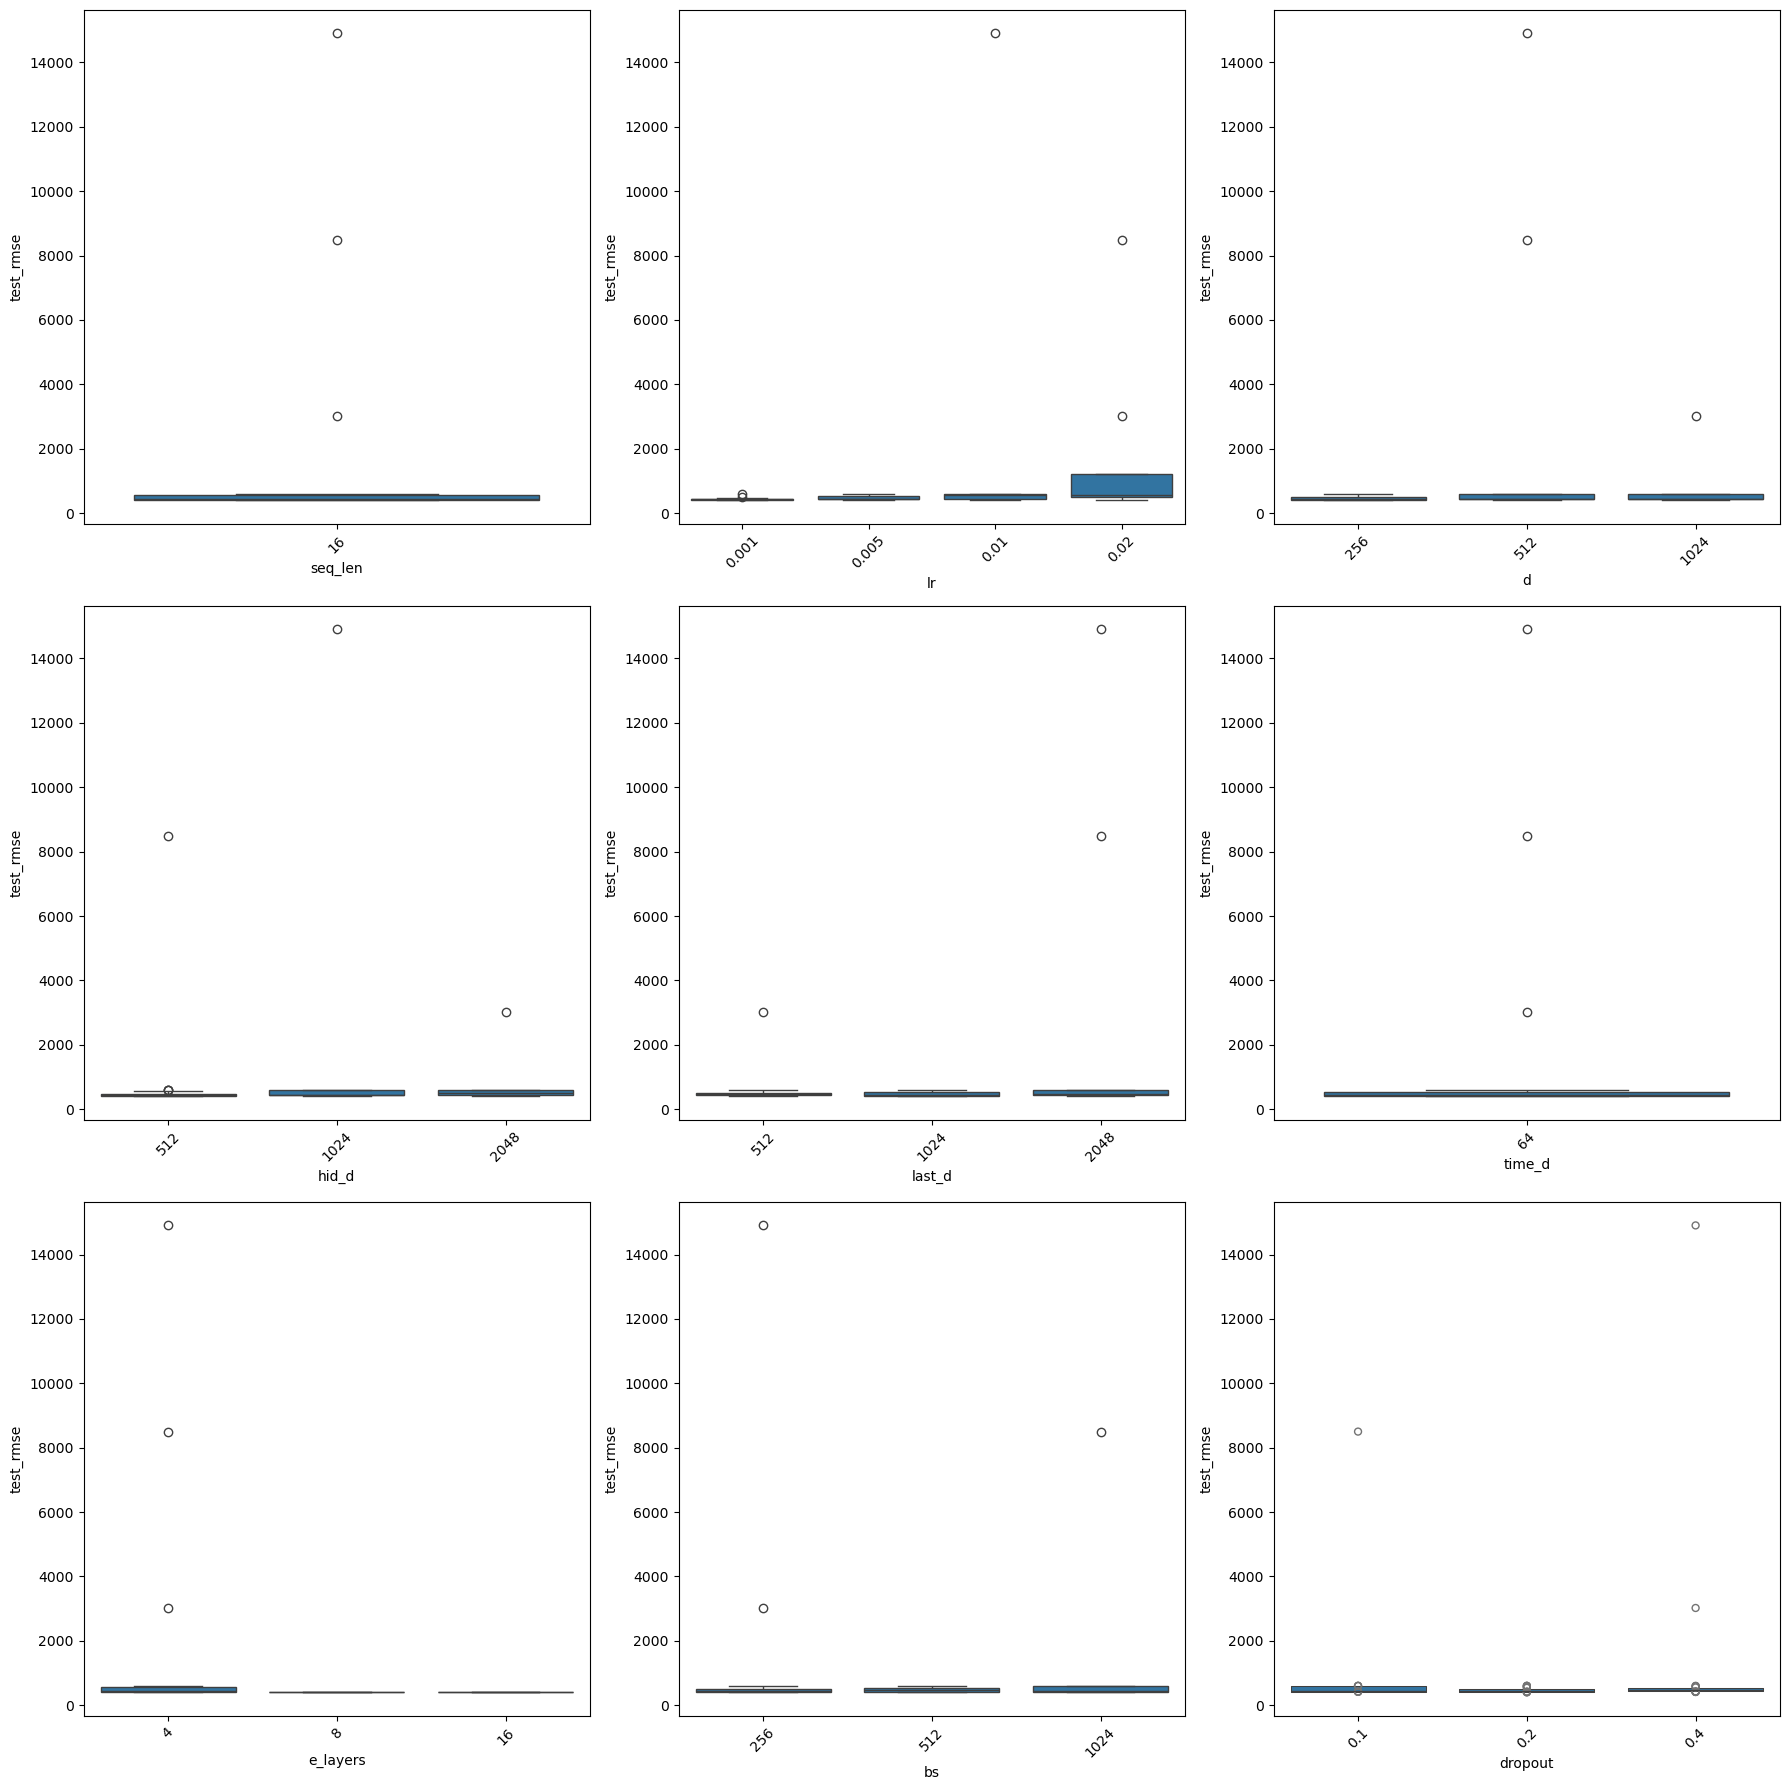

In [6]:
# Analyzing the effect of each setting on RMSEs
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Plotting
sns.boxplot(ax=axes[0, 0], x="seq_len", y="train_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="train_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="train_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="train_rmse", data=df)
sns.boxenplot(ax=axes[2, 2], x="dropout", y="train_rmse", data=df)


for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

# Repeat for val_rmse and test_rmse
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], x="seq_len", y="val_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="val_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="val_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="val_rmse", data=df)
sns.boxenplot(ax=axes[2, 2], x="dropout", y="val_rmse", data=df)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], x="seq_len", y="test_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="test_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="test_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="test_rmse", data=df)
sns.boxenplot(ax=axes[2, 2], x="dropout", y="test_rmse", data=df)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

In [7]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] = 0.2* df["train_rmse"] +0.4* df["val_rmse"] + 0.4* df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse")


In [8]:
sorted_df

,exp_date,train_rmse,train_custom_acc,val_rmse_for_best_train,val_custom_acc_for_best_train,test_rmse_for_best_train,test_custom_acc_for_best_train,train_epoch_for_best_train,val_rmse,val_custom_acc,...,d,hid_d,last_d,time_d,e_layers,token_emb_kernel_size,dropout,comb_type,bs,sum_rmse
53,2024-08-06 22:32,54.400314,89.666122,404.01280,21.593231,450.93440,-12.858312,28,372.50284,39.619869,...,256,512,1024,64,16,11,0.2,add,256,319.195531
22,2024-08-07 01:33,66.241690,87.313156,468.35080,44.904488,582.46655,29.605879,22,361.02963,35.299252,...,256,512,1024,64,4,13,0.1,add,256,325.511238
48,2024-08-07 01:17,75.051460,85.970482,394.92654,52.193165,454.05884,50.008545,42,369.27063,45.029125,...,256,512,512,64,4,13,0.4,add,1024,327.318032
54,2024-08-06 22:35,55.361336,89.466110,389.80334,26.812609,439.33536,3.634228,30,396.16220,47.286045,...,256,512,1024,64,16,11,0.2,add,256,330.202199
31,2024-08-07 01:55,26.025942,95.084358,447.53275,48.375710,545.53217,41.187187,24,379.18484,49.744064,...,256,1024,1024,64,4,9,0.1,add,256,330.781052
3,2024-08-07 02:14,44.718260,90.686348,423.58167,50.365742,506.02520,45.599640,24,381.61304,38.787819,...,512,512,1024,64,4,9,0.2,add,256,331.999452
28,2024-08-06 22:44,50.868076,90.130249,477.65097,45.327808,591.01110,28.372801,29,392.68448,27.079025,...,256,512,1024,64,4,11,0.2,add,256,334.026471
25,2024-08-06 22:31,45.430874,91.478798,401.60367,45.161896,437.76040,45.222977,30,398.57697,44.793201,...,256,512,1024,64,8,11,0.4,add,256,334.474251
4,2024-08-07 00:47,47.992980,90.623451,503.41608,41.686813,595.65580,26.757406,20,405.30463,35.591030,...,512,1024,512,64,4,11,0.1,add,512,340.192520
8,2024-08-06 23:23,42.526497,90.706497,507.21265,41.090302,597.74870,25.593836,25,402.05423,49.474018,...,1024,512,512,64,4,13,0.1,add,256,340.357971


In [9]:

# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    # "train_custom_acc_for_best_val",
    # "train_custom_acc",
    # "val_custom_acc",
    # "test_custom_acc",
    # "train_custom_acc_for_best_test",
    # "val_custom_acc_for_best_train",
    # "val_custom_acc_for_best_test",
    # "test_custom_acc_for_best_train",
    # "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)



In [10]:

# print last few columns
print(output.iloc[:, -30:])

    val_custom_acc_for_best_train  test_rmse_for_best_train  \
53                      21.593231                 450.93440   
22                      44.904488                 582.46655   
48                      52.193165                 454.05884   
54                      26.812609                 439.33536   
31                      48.375710                 545.53217   
3                       50.365742                 506.02520   
28                      45.327808                 591.01110   
25                      45.161896                 437.76040   
4                       41.686813                 595.65580   
8                       41.090302                 597.74870   

    test_custom_acc_for_best_train  train_epoch_for_best_train   val_rmse  \
53                      -12.858312                          28  372.50284   
22                       29.605879                          22  361.02963   
48                       50.008545                          42  369.27063  